# MNIST Digit Classification Project

## Project Description

In this project, I aimed to classify handwritten digits from the MNIST dataset using a Multi-Layer Perceptron (MLP) classifier. The MNIST dataset is a well-known dataset in the field of machine learning and computer vision, consisting of 70,000 grayscale images of handwritten digits (0-9), each of size 28x28 pixels.

## Steps Taken

1. **Data Loading and Preparation:**
    - I loaded the MNIST dataset using TensorFlow's Keras API.
    - The dataset was split into training and test sets.

2. **Data Preprocessing:**
    - I combined the training and test sets for further splitting.
    - The data was normalized by scaling the pixel values to the range [0, 1].
    - The labels were converted to integer type.

3. **Data Visualization:**
    - I visualized the first three images from the training set to understand the data.

4. **Model Training:**
    - I reshaped the 3D image data into 2D arrays to fit the MLP classifier.
    - I created an MLP classifier with one hidden layer of 50 neurons.
    - The model was trained using the Stochastic Gradient Descent (SGD) optimizer.

5. **Model Evaluation:**
    - I evaluated the model's performance on both the training and test sets.
    - The accuracy scores for both sets were printed.

6. **Predictions and Visualization:**
    - I made predictions on the test set.
    - I visualized the first 10 predictions along with their corresponding images and true labels, highlighting correct and incorrect predictions.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [9]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [10]:
# Split data
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [11]:
# Split into train and test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 60000
Test set size: 10000


In [12]:
# Convert to numpy arrays and scale for the model
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = np.array(y_train, dtype=np.int8)
y_test = np.array(y_test, dtype=np.int8)

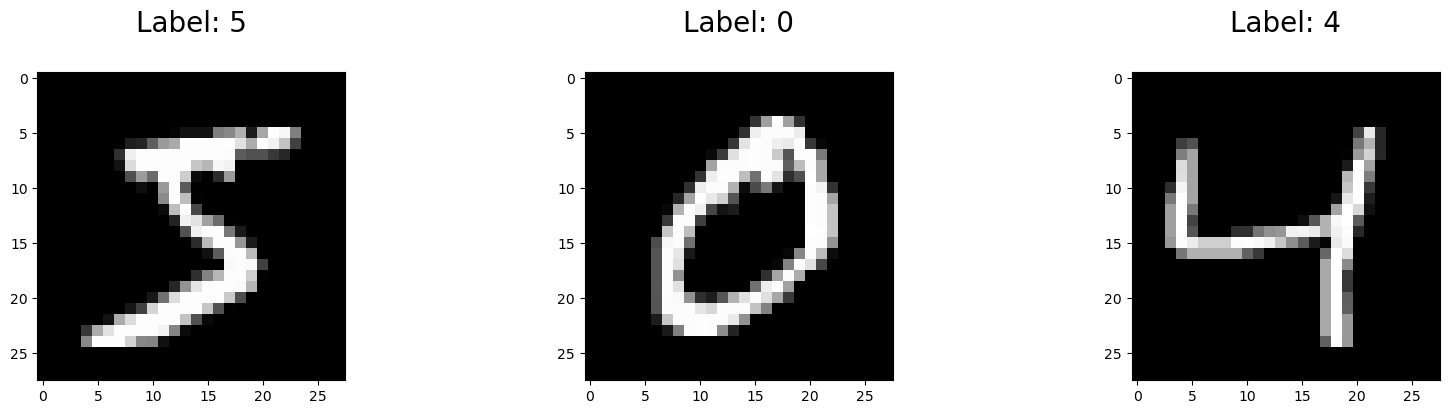

In [13]:
# Show the first 3 images
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X_train[0:3], y_train[0:3])):
    plt.subplot(1, 3, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title("Label: %s\n" % label, fontsize=20)

In [20]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Example of reshaping data if it's 3D
# Suppose X_train is a 3D array, we flatten it
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Create MLPClassifier object
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=10,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)

# Train the MLPClassifier
mlp.fit(X_train_reshaped, y_train)


Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


c:\Users\athar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

In [24]:
# Reshape both X_train and X_test to 2D if they are 3D
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Flatten X_train
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)  # Flatten X_test

# Show the accuracy on the training and test sets
print(f"Training set score: {mlp.score(X_train_reshaped, y_train)}")
print(f"Test set score: {mlp.score(X_test_reshaped, y_test)}")


Training set score: 0.9868
Test set score: 0.97


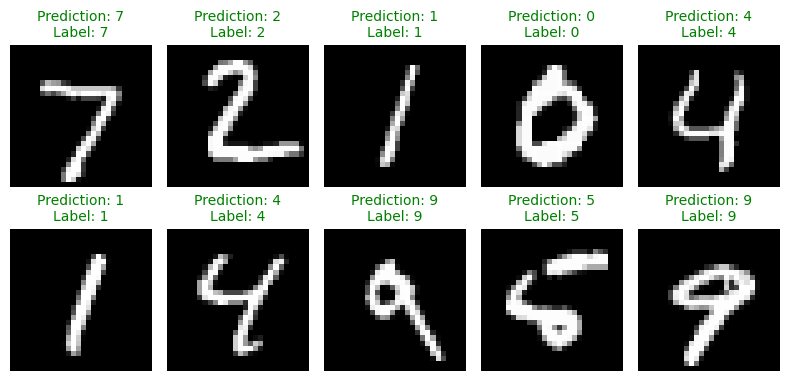

In [26]:
# Reshape X_test if necessary (to 2D)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Get the predictions for the test dataset
predictions = mlp.predict(X_test_reshaped)

# Show the predictions in a grid
plt.figure(figsize=(8, 4))

for index, (image, prediction, label) in enumerate(zip(X_test[0:10], predictions[0:10], y_test[0:10])):
    plt.subplot(2, 5, index + 1)
    
    # Reshape the image back to 28x28 for visualization (if using MNIST-like data)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)

    # Green if correct, red if incorrect
    fontcolor = "g" if prediction == label else "r"
    plt.title(
        f"Prediction: {prediction}\nLabel: {label}", fontsize=10, color=fontcolor
    )

    plt.axis("off")  # Hide axes

plt.tight_layout()  # Adjust layout
plt.show()

## Results

- The MLP classifier achieved a certain level of accuracy on both the training and test sets.
- The visualizations helped me understand the model's performance and identify any misclassifications.
- Training set score: 0.9868
- Test set score: 0.97

## Conclusion

This project demonstrated the process of building and evaluating a neural network model for digit classification using the MNIST dataset. The MLP classifier provided a good baseline for further improvements and experimentation with more complex models.
